In [ ]:
### ***Importing Libraries***
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_customer = pd.read_csv('/content/customer_info.csv',)
df_product = pd.read_csv('/content/product_info.csv',)
df_sales = pd.read_csv('/content/sales_data.csv')

print("Customer:\n", df_customer.head(15)),
print("\n Product: \n", df_product.head(15))
print("\n Sales: \n", df_sales.head(15))

Customer:
    customer_id                        email signup_date  gender   region  \
0       C00001       shaneramirez@gmail.com    26-04-25    Male  Central   
1       C00002        jpeterson@bernard.com    11-08-24  Female  Central   
2       C00003      howardmaurice@yahoo.com    15-05-25    male  Central   
3       C00004          yherrera@arnold.org    14-06-25  FEMALE  Central   
4       C00005      janetwilliams@gmail.com    02-05-25    Male     West   
5       C00006      wyattmichelle@yahoo.com    21-10-24    male  Central   
6       C00007      francisco53@hotmail.com    17-10-24  FEMALE    North   
7       C00008  amandasanchez@gray-mayo.net    29-09-24    male  Central   
8       C00009       perezantonio@yahoo.com    08-12-24  FEMALE    South   
9       C00010      clarksherri@hotmail.com    05-11-24    male     East   
10      C00011    pfoster@thomas-taylor.net    31-01-25   Other     East   
11      C00012             zhurst@yahoo.com    29-09-24   femle    North   
1

In [ ]:
print("Customer:\n", df_customer.info())
print("Product: \n", df_product.info())
print("Sales: \n", df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB
Customer:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ 

In [ ]:
print("\n Customer:\n \n", df_customer.isnull().sum())
print("\n Product: \n \n", df_product.isnull().sum())
print("\n Sales: \n \n", df_sales.isnull().sum())


 Customer:
 
 customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64

 Product: 
 
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

 Sales: 
 
 order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            2
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64


In [ ]:
# convert signup_date and order_date to DateTime

df_customer['signup_date'] = pd.to_datetime(df_customer['signup_date'],errors='coerce',dayfirst=True)
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'],errors='coerce',dayfirst=True)
df_product['launch_date'] = pd.to_datetime(df_product['launch_date'],errors='coerce',dayfirst=True)

/tmp/ipython-input-4247146368.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_customer['signup_date'] = pd.to_datetime(df_customer['signup_date'],errors='coerce',dayfirst=True)
/tmp/ipython-input-4247146368.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_product['launch_date'] = pd.to_datetime(df_product['launch_date'],errors='coerce',dayfirst=True)


In [ ]:
# Fill missing values in categorical (object) columns with "Other"
for df_obj in [df_customer, df_product, df_sales]:
    categorical_cols = df_obj.select_dtypes(include="object").columns
    df_obj[categorical_cols] = df_obj[categorical_cols].fillna("Unknown")

In [ ]:
# Filling empty numeric cells with 0
df_customer.fillna(0)
df_sales.fillna(0)
df_product.fillna(0)


,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,2025-03-11,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,2025-04-19,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559
5,P0006,Cleaning Product 16,Cleaning,2024-10-09,36.06,S980
6,P0007,Personal Care Product 64,Personal Care,2024-09-30,33.63,S379
7,P0008,Storage Product 47,Storage,2024-08-29,31.96,S788
8,P0009,Outdoors Product 13,Outdoors,2025-04-18,8.00,S695
9,P0010,Cleaning Product 70,Cleaning,2024-08-14,17.72,S321


In [ ]:
# drop columns in sales and customer data-set
df_customer.dropna()
df_sales.dropna()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,2025-07-06,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,2025-07-07,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,2025-07-08,DELAYED,Credit Card,West,0.20
...,...,...,...,...,...,...,...,...,...,...
2995,O868860,C00233,P0001,5,43.40,2025-05-29,Delivered,Bank Transfer,West,0.20
2996,O949709,C00246,P0029,4,34.04,2025-05-29,DELAYED,Bank Transfer,West,0.20
2997,O763639,C00182,P0026,1,42.34,2025-05-29,Delivered,credit card,South,0.00
2998,O753958,C00074,P0003,5,35.96,2025-05-29,Delivered,Credit Card,Central,0.00


In [ ]:
df_product.interpolate()
df_sales.interpolate()

/tmp/ipython-input-2408902449.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_product.interpolate()
/tmp/ipython-input-2408902449.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_sales.interpolate()


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,2025-07-06,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,2025-07-07,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,2025-07-08,DELAYED,Credit Card,West,0.20
...,...,...,...,...,...,...,...,...,...,...
2995,O868860,C00233,P0001,5,43.40,2025-05-29,Delivered,Bank Transfer,West,0.20
2996,O949709,C00246,P0029,4,34.04,2025-05-29,DELAYED,Bank Transfer,West,0.20
2997,O763639,C00182,P0026,1,42.34,2025-05-29,Delivered,credit card,South,0.00
2998,O753958,C00074,P0003,5,35.96,2025-05-29,Delivered,Credit Card,Central,0.00


In [ ]:
# Drop duplicate values
print("Customer:\n", df_customer.drop_duplicates())
print("\n Product: \n", df_product.drop_duplicates())
print("\n Sales: \n", df_sales.drop_duplicates())

Customer:
     customer_id                      email signup_date   gender   region  \
0        C00001     shaneramirez@gmail.com  2025-04-26     Male  Central   
1        C00002      jpeterson@bernard.com  2024-08-11   Female  Central   
2        C00003    howardmaurice@yahoo.com  2025-05-15     male  Central   
3        C00004        yherrera@arnold.org  2025-06-14   FEMALE  Central   
4        C00005    janetwilliams@gmail.com  2025-05-02     Male     West   
..          ...                        ...         ...      ...      ...   
495      C00496         simsjohn@wiley.net  2025-02-19    femle  Central   
496      C00497  cameronwilliams@yahoo.com  2024-12-30  Unknown     West   
497      C00498          ibarron@yahoo.com  2025-06-21     male    South   
498      C00499          karen26@gmail.com  2024-10-02   Female    North   
499      C00500   jasonjohnson@jackson.com  2024-11-28     Male    North   

    loyalty_tier  
0         Silver  
1          gold   
2          gold   


In [ ]:
# formating fonts to title
def clean_text_column(series):
    """Standardize text formatting for a pandas Series."""
    if series.dtype == object:  # Only text columns
        series = series.astype(str).str.strip()
        series = series.str.title()
    return series

# Create a dictionary to map dataframe names to their objects and output prefixes
dataframes_to_process = {
    "df_customer": {"df": df_customer, "output_prefix": "customer_info"},
    "df_product": {"df": df_product, "output_prefix": "product_info"},
    "df_sales": {"df": df_sales, "output_prefix": "sales_data"}
}

for df_key, data in dataframes_to_process.items():
    current_df = data["df"]
    output_prefix = data["output_prefix"]

    # Apply cleaning to all text columns in the current DataFrame
    for col in current_df.columns:
        current_df[col] = clean_text_column(current_df[col])



In [ ]:
print("Customer:\n", df_customer.head(15)),
print("\n Product: \n", df_product.head(15))
print("\n Sales: \n", df_sales.head(15))

Customer:
    customer_id                        email signup_date  gender   region  \
0       C00001       Shaneramirez@Gmail.Com  2025-04-26    Male  Central   
1       C00002        Jpeterson@Bernard.Com  2024-08-11  Female  Central   
2       C00003      Howardmaurice@Yahoo.Com  2025-05-15    Male  Central   
3       C00004          Yherrera@Arnold.Org  2025-06-14  Female  Central   
4       C00005      Janetwilliams@Gmail.Com  2025-05-02    Male     West   
5       C00006      Wyattmichelle@Yahoo.Com  2024-10-21    Male  Central   
6       C00007      Francisco53@Hotmail.Com  2024-10-17  Female    North   
7       C00008  Amandasanchez@Gray-Mayo.Net  2024-09-29    Male  Central   
8       C00009       Perezantonio@Yahoo.Com  2024-12-08  Female    South   
9       C00010      Clarksherri@Hotmail.Com  2024-11-05    Male     East   
10      C00011    Pfoster@Thomas-Taylor.Net  2025-01-31   Other     East   
11      C00012             Zhurst@Yahoo.Com  2024-09-29   Femle    North   
1

In [ ]:
# Merge on product_id
sale_product_merge_df = pd.merge(df_sales, df_product, on="product_id", how="left")

In [ ]:
Final_merge_df = pd.merge(sale_product_merge_df, df_customer,on="customer_id", how="left")

In [ ]:
Final_merge_df.head(20)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,Jacquelinemartin@Mills-Logan.Com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,Georgeweber@Morgan.Com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,Lcook@Walters-Smith.Com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,Smoore@Gmail.Com,2024-07-28,Femle,Central,Gold
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,Mcclainkatherine@Hotmail.Com,2024-09-18,Male,Central,Gold
5,O190175,C00388,P0005,3,37.89,2025-07-10,Delayed,Bank Transfer,North,0.10,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559,Abbottdominique@Yahoo.Com,2024-09-23,Male,North,Gold
6,O272646,C00328,P0027,5,30.83,2025-07-12,Delivered,Paypal,Central,0.05,Outdoors Product 55,Outdoors,2024-09-21,23.05,S127,Adamsnorman@Moore.Com,2024-07-08,Female,Central,Gold
7,O411881,C00201,P0019,3,12.56,2025-07-14,Delivered,Credit Card,East,0.00,Kitchen Product 42,Kitchen,2024-07-17,30.30,S993,Christopher24@Whitehead-Hernandez.Biz,2024-08-10,Female,East,Gold
8,O170570,C00076,P0030,3,28.32,2025-07-16,Delivered,Paypal,Central,0.15,Cleaning Product 72,Cleaning,2025-04-04,9.77,S455,Jeffrey10@Herring.Com,2025-03-04,Femle,North,Gold
9,O619944,C00330,P0002,1,30.96,2025-07-18,Delayed,Credit Card,South,0.15,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974,Ryanhawkins@Russell.Com,2025-02-22,Other,West,Bronze


In [ ]:
Final_merge_df.to_csv("Final_merge_df.csv")

In [ ]:
# Fill NaN values in 'discount_applied' with 0.0
Final_merge_df['discount_applied'] = Final_merge_df['discount_applied'].fillna(0.0)

In [ ]:
# Filling the Price Columns with Mean Value
numeric_cols = Final_merge_df.select_dtypes(include=['float64']).columns
for col in numeric_cols:
    if Final_merge_df[col].isnull().sum() > 0:
        Final_merge_df[col] = Final_merge_df[col].fillna(Final_merge_df[col].mean())

In [ ]:
# Filling Date Columns with Mode (Most Frequent)
date_cols = ['order_date', 'launch_date', 'signup_date']
for col in date_cols:
    if col in Final_merge_df.columns and Final_merge_df[col].isnull().sum() > 0:
        Final_merge_df[col] = Final_merge_df[col].fillna(Final_merge_df[col].mode()[0])

In [ ]:
# Filling remaining Categorical Columns with "Unknown"
object_cols = Final_merge_df.select_dtypes(include=['object']).columns
for col in object_cols:
    if Final_merge_df[col].isnull().sum() > 0:
        Final_merge_df[col] = Final_merge_df[col].fillna('Unknown')

In [ ]:
Final_merge_df.head(20)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,Jacquelinemartin@Mills-Logan.Com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,Georgeweber@Morgan.Com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,Lcook@Walters-Smith.Com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,Smoore@Gmail.Com,2024-07-28,Femle,Central,Gold
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,Mcclainkatherine@Hotmail.Com,2024-09-18,Male,Central,Gold
5,O190175,C00388,P0005,3,37.89,2025-07-10,Delayed,Bank Transfer,North,0.10,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559,Abbottdominique@Yahoo.Com,2024-09-23,Male,North,Gold
6,O272646,C00328,P0027,5,30.83,2025-07-12,Delivered,Paypal,Central,0.05,Outdoors Product 55,Outdoors,2024-09-21,23.05,S127,Adamsnorman@Moore.Com,2024-07-08,Female,Central,Gold
7,O411881,C00201,P0019,3,12.56,2025-07-14,Delivered,Credit Card,East,0.00,Kitchen Product 42,Kitchen,2024-07-17,30.30,S993,Christopher24@Whitehead-Hernandez.Biz,2024-08-10,Female,East,Gold
8,O170570,C00076,P0030,3,28.32,2025-07-16,Delivered,Paypal,Central,0.15,Cleaning Product 72,Cleaning,2025-04-04,9.77,S455,Jeffrey10@Herring.Com,2025-03-04,Femle,North,Gold
9,O619944,C00330,P0002,1,30.96,2025-07-18,Delayed,Credit Card,South,0.15,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974,Ryanhawkins@Russell.Com,2025-02-22,Other,West,Bronze


In [ ]:
# Map for the qauntity column
quantity_map = {
    'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5,
    'Six': 6, 'Seven': 7, 'Eight': 8, 'Nine': 9, 'Ten': 10
}
Final_merge_df['quantity'] = Final_merge_df['quantity'].replace(quantity_map)

# Converting any remaining non-numeric values (like 'Unknown') to NaN
Final_merge_df['quantity'] = pd.to_numeric(Final_merge_df['quantity'], errors='coerce')

In [ ]:
# checking for non-negative
(Final_merge_df[['quantity', 'unit_price', 'discount_applied']] >= 0).all().all()

np.False_

In [ ]:
# Futher correction and standardization of the 'gender' column
gender_map2 = {
    'Femle': 'Female',
    }
Final_merge_df['gender'] = Final_merge_df['gender'].replace(gender_map2)

# Further correction and standardization the 'loyalty_tier' column
loyalty_map2 = {
    'Sllver': 'Silver',
    'Gld': 'Gold',
    'Brnze': 'Bronze',
    'Platium': 'Platinum',
    'Diamond': 'Diamond'
}
Final_merge_df['loyalty_tier'] = Final_merge_df['loyalty_tier'].replace(loyalty_map2)

In [ ]:
Final_merge_df.head(5)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,Jacquelinemartin@Mills-Logan.Com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,Georgeweber@Morgan.Com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,Lcook@Walters-Smith.Com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,Smoore@Gmail.Com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,Mcclainkatherine@Hotmail.Com,2024-09-18,Male,Central,Gold


In [ ]:
# Create new columns

# revenue = quantity × unit_price × (1 - discount_applied)
Final_merge_df['revenue'] = Final_merge_df['quantity'] * Final_merge_df['unit_price'] * (1 - Final_merge_df['discount_applied'])

# order_week = ISO week from order_date
# Using .dt.isocalendar().week for the ISO week number.
Final_merge_df['order_week'] = Final_merge_df['order_date'].dt.isocalendar().week.astype(int)

# price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30)
bins = [0, 15, 30, np.inf]
labels = ['Low', 'Medium', 'High']
Final_merge_df['price_band'] = pd.cut(Final_merge_df['unit_price'], bins=bins, labels=labels, right=False)

# days_to_order = Days between launch_date and order_date
Final_merge_df['days_to_order'] = (Final_merge_df['order_date'] - Final_merge_df['launch_date']).dt.days

# email_domain = Extract domain from email (e.g., gmail.com)
Final_merge_df['email_domain'] = Final_merge_df['email'].str.split('@').str[1]

# is_late = True if delivery_status is "Delayed"
Final_merge_df['is_late'] = Final_merge_df['delivery_status'] == 'Delayed'

# Additional column needed for customer analysis: signup_month (Question 3)
Final_merge_df['signup_month'] = Final_merge_df['signup_date'].dt.strftime('%Y-%m')

In [ ]:
Final_merge_df.head(5)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,...,gender,region_y,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,Female,North,Silver,117.750,27,High,275,Mills-Logan.Com,False,2024-09
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,Other,North,Gold,94.600,27,Medium,169,Morgan.Com,True,2024-08
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,Male,Central,Gold,25.228,28,Medium,104,Walters-Smith.Com,False,2024-09
3,O501803,C00031,P0003,1.0,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,Female,Central,Gold,26.208,28,High,358,Gmail.Com,False,2024-07
4,O322242,C00495,P0016,1.0,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,Male,Central,Gold,38.096,28,High,138,Hotmail.Com,True,2024-09


In [ ]:
Final_merge_df.drop(columns= [
    "order_id",
    "product_id",
    "product_name",
    "launch_date",
    "supplier_code",
    "email",
    "gender",
    "region_y"
], axis=1, errors='ignore')

,customer_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,category,base_price,signup_date,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month
0,C00397,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning,19.77,2024-09-08,Silver,117.750,27,High,275,Mills-Logan.Com,False,2024-09
1,C00236,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors,36.04,2024-08-06,Gold,94.600,27,Medium,169,Morgan.Com,True,2024-08
2,C00492,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen,11.08,2024-09-25,Gold,25.228,28,Medium,104,Walters-Smith.Com,False,2024-09
3,C00031,1.0,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning,7.92,2024-07-28,Gold,26.208,28,High,358,Gmail.Com,False,2024-07
4,C00495,1.0,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning,26.71,2024-09-18,Gold,38.096,28,High,138,Hotmail.Com,True,2024-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,C00233,5.0,43.40,2025-05-29,Delivered,Bank Transfer,West,0.20,Storage,15.88,2024-11-01,Silver,173.600,22,High,79,Guerra.Com,False,2024-11
3000,C00246,4.0,34.04,2025-05-29,Delayed,Bank Transfer,West,0.20,Cleaning,23.41,2024-10-24,Gold,108.928,22,High,75,Simpson-Khan.Info,True,2024-10
3001,C00182,1.0,42.34,2025-05-29,Delivered,Credit Card,South,0.00,Storage,27.06,2025-02-24,Gold,42.340,22,High,110,Thomas.Com,False,2025-02
3002,C00074,5.0,35.96,2025-05-29,Delivered,Credit Card,Central,0.00,Cleaning,7.92,2024-10-22,Bronze,179.800,22,High,318,Yahoo.Com,False,2024-10


In [ ]:
Final_merge_df.to_csv('C&S_Beh_Insight.csv')

**Create Summary Tables **

In [ ]:
# Weekly revenue trends by region

weekly_revenue = Final_merge_df.groupby([ 'region_x','order_week'])['revenue'].sum().reset_index()
weekly_revenue = weekly_revenue.rename(columns={'revenue': 'Total_Revenue'})
print(weekly_revenue)

    region_x  order_week  Total_Revenue
0    Central          14        68.7600
1    Central          15        16.0650
2    Central          16        14.8480
3    Central          18       210.8545
4    Central          19      1655.5365
..       ...         ...            ...
102     West          31      3507.6300
103     West          32      2261.8445
104     West          33      3105.2600
105     West          34      2087.3260
106     West          35       139.6240

[107 rows x 3 columns]


In [ ]:
#  Product category performance (revenue, quantity, discount)
category_performance = Final_merge_df.groupby('category').agg(
    Total_Revenue=('revenue', 'sum'),
    Total_Quantity=('quantity', 'sum'),
    Avg_Discount_Applied=('discount_applied', 'mean'),
    Region = ('region_x', 'first')
).sort_values(by='Total_Revenue', ascending=False)

print(category_performance)

               Total_Revenue  Total_Quantity  Avg_Discount_Applied   Region
category                                                                   
Cleaning        93836.177000          3595.0              0.085626  Central
Storage         47037.747500          1733.0              0.080763     East
Outdoors        40202.297588          1525.0              0.082087    North
Kitchen         33993.041500          1229.0              0.075558    North
Personal Care   24965.356500           906.0              0.086184    North
Unknown           610.656500            22.0              0.150000    South


In [ ]:
# Customer behaviour by loyalty_tier and signup_month (Count of unique customers)
customer_behavior = Final_merge_df.groupby(['loyalty_tier', 'signup_month']
            )['customer_id'].nunique().reset_index(name='Unique_Customer_Count')

print(customer_behavior)


   loyalty_tier signup_month  Unique_Customer_Count
0        Bronze      2024-07                     10
1        Bronze      2024-08                     11
2        Bronze      2024-09                      7
3        Bronze      2024-10                     12
4        Bronze      2024-11                      9
5        Bronze      2024-12                     10
6        Bronze      2025-01                     12
7        Bronze      2025-02                      9
8        Bronze      2025-03                      5
9        Bronze      2025-04                      9
10       Bronze      2025-05                      7
11       Bronze      2025-06                     13
12         Gold      2024-07                     20
13         Gold      2024-08                     32
14         Gold      2024-09                     24
15         Gold      2024-10                     25
16         Gold      2024-11                     22
17         Gold      2024-12                     29
18         G

In [ ]:
#  Delivery performance by region and price_band
# Calculate Late_Delivery_Rate as the mean of the boolean 'is_late' column (True=1, False=0)
delivery_performance = Final_merge_df.groupby(['region_x', 'price_band']).agg(
    Total_Orders=('order_id', 'count'),
    Avg_Days_to_Order=('days_to_order', 'mean'),
    Late_Delivery_Rate=('is_late', 'mean')
).sort_values(by='Late_Delivery_Rate', ascending=False)

print(delivery_performance)

                     Total_Orders  Avg_Days_to_Order  Late_Delivery_Rate
region_x price_band                                                     
North    Medium               205         201.965854            0.443902
East     Medium               239         219.451883            0.422594
South    High                 297         208.619529            0.420875
East     Low                   96         200.770833            0.416667
         High                 267         212.003745            0.408240
Central  High                 265         202.845283            0.392453
         Medium               225         206.648889            0.391111
West     Low                   77         211.883117            0.389610
North    Low                  107         210.028037            0.383178
West     High                 270         212.377778            0.381481
Central  Low                  115         216.400000            0.373913
North    High                 293         205.35836

/tmp/ipython-input-2962354788.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_performance = Final_merge_df.groupby(['region_x', 'price_band']).agg(


In [ ]:
# Preferred payment methods by loyalty_tier (using pivot_table)
payment_method_pivot = pd.pivot_table(
    Final_merge_df,
    index='loyalty_tier',
    columns='payment_method',
    values='order_id',
    aggfunc='count',
    fill_value=0
)

# Convert counts to percentages of total orders per loyalty tier for comparison
payment_method_pivot_perc = payment_method_pivot.div(payment_method_pivot.sum(axis=1), axis=0).mul(100).round(2)
payment_method_pivot_perc = payment_method_pivot_perc.rename_axis(None, axis=1)

print(payment_method_pivot_perc)

              Bank Transfer  Bank Transfr  Credit Card  Paypal  Unknown
loyalty_tier                                                           
Bronze                28.66          0.00        45.22   26.11     0.00
Gold                  24.12          0.06        50.09   25.61     0.12
Silver                29.07          0.00        46.08   24.70     0.15
Unknown               12.12          0.00        66.67   21.21     0.00


]**Visual** **Exploration**]

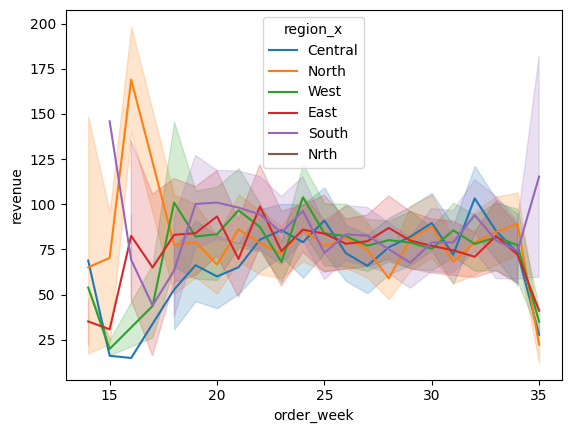

In [ ]:
# Plot for weekly revenue trend by region
sns.lineplot(x="order_week", y="revenue",
             hue="region_x",
             data=Final_merge_df)
plt.show()

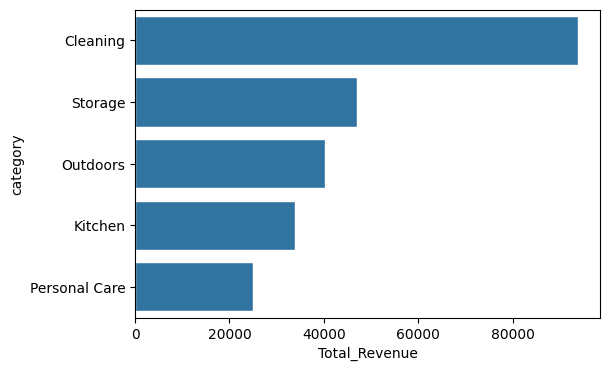

/tmp/ipython-input-591153044.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(ncol=2, loc="lower right", frameon=True)


<Figure size 640x480 with 0 Axes>

In [ ]:
#  Product category performance

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

category_by_revenue = Final_merge_df.groupby('category').agg(
    Total_Revenue=('revenue', 'sum'),
).sort_values(by='Total_Revenue', ascending=False)
sns.set_theme(style="whitegrid")
sns.barplot(x="Total_Revenue", y="category", data=category_by_revenue.head(5))
plt.show()
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="category",
       xlabel="Total Revenue")
sns.despine(left=True, bottom=True)
plt.show()



/tmp/ipython-input-2086364745.py:4: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="category", y="discount_applied",


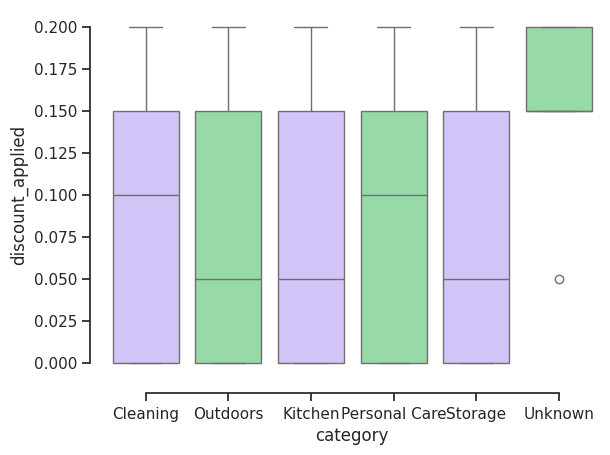

In [ ]:
# Quantity vs Discount Accross Categories
sns.set_theme(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="category", y="discount_applied",
            hue="category", palette=["m", "g"],
            data=Final_merge_df)
sns.despine(offset=10, trim=True)

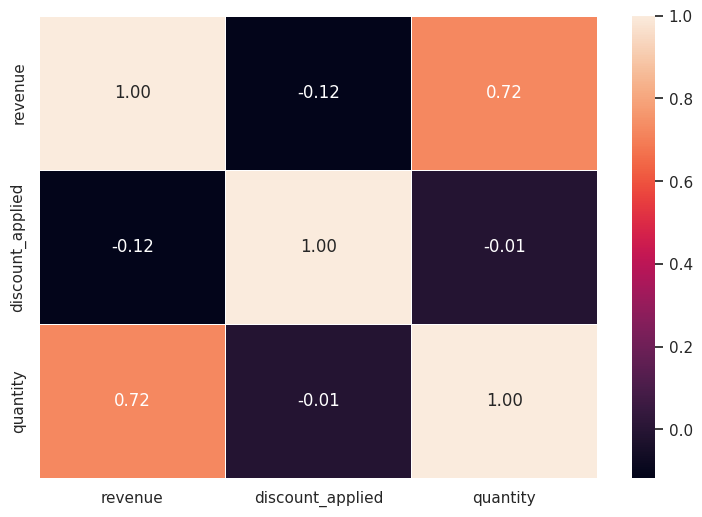

In [ ]:
# correlation between revenue, discount_applied,and qauntity
sns.set_theme()

# Select the required numerical columns
correlation_matrix = Final_merge_df[['revenue', 'discount_applied', 'quantity']].corr()

# Draw a hitmap with numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, ax=ax,)
plt.show()

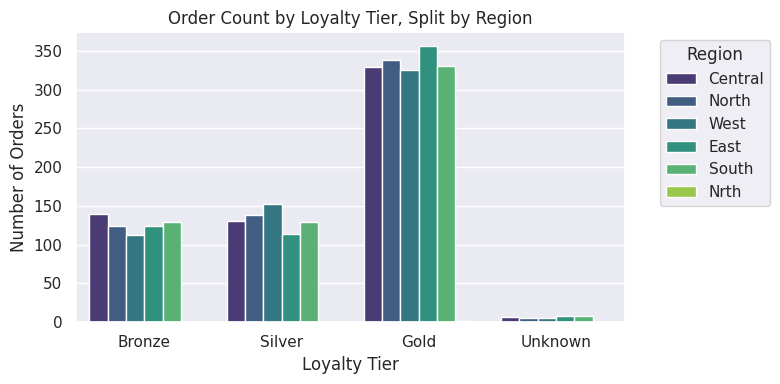

In [ ]:
# Countplot by loyalty tier

plt.figure(figsize=(8, 4))

sns.countplot(
    x='loyalty_tier',
    hue='region_x',
    data=Final_merge_df,

# Define a specific order for better visualization
    order=['Bronze', 'Silver', 'Gold', 'Unknown'],
    palette='viridis'
)

plt.title('Order Count by Loyalty Tier, Split by Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

**Optional Stretch Task**

In [ ]:
# Customers who signed up in 2nd qaurter

Final_merge_df.query('signup_date.dt.quarter == 2'
)[['customer_id', 'signup_date', 'email', 'gender']
  ].drop_duplicates(subset='customer_id')

,customer_id,signup_date,email,gender
20,C00211,2025-05-17,Ingramjill@Anderson-Bell.Com,Male
22,C00369,2025-06-27,Taylorkaren@Yahoo.Com,Other
32,C00259,2025-06-25,Ledwards@Yahoo.Com,Female
33,C00464,2025-04-01,Mthomas@Hotmail.Com,Male
34,C00398,2025-06-15,Karamarks@Hotmail.Com,Other
...,...,...,...,...
1873,C00488,2025-06-07,Eyork@Gmail.Com,Male
1908,C00435,2025-04-16,Rogersmarcus@Gmail.Com,Male
2095,C00218,2025-05-21,Acostachristian@Hotmail.Com,Female
2688,C00367,2025-05-17,Imartin@Gmail.Com,Female


In [ ]:
# Placed an order within 14 days

Final_merge_df['days_to_order'] = (Final_merge_df['order_date'] - Final_merge_df['signup_date']).dt.days

early_Customers = Final_merge_df.query('days_to_order <= 14')

unique_customers = early_Customers[['customer_id', 'signup_date', 'email', 'gender', 'loyalty_tier', 'region_y']].drop_duplicates(subset='customer_id')
print(unique_customers)


     customer_id signup_date                               email  gender  \
81        C00056  2025-05-25         Christinaturner@Hotmail.Com    Male   
89        C00259  2025-06-25                  Ledwards@Yahoo.Com  Female   
90        C00126  2025-06-02                 Matthew61@Yahoo.Com  Female   
93        C00139  2025-06-11  Browningmark@Thompson-Anderson.Net   Other   
98        C00221  2025-05-31             Lambertrichard@Owen.Com  Female   
...          ...         ...                                 ...     ...   
2022      C00069  2025-06-22                    Abrown@Yahoo.Com  Female   
2039      C00119  2025-05-20        Hillkristy@Morgan-French.Com  Female   
2063      C00196  2025-05-16           Stanleynancy@Anderson.Org  Female   
2870      C00271  2025-06-16                   Shawn88@Yahoo.Com  Female   
2917      C00141  2025-06-05           Mcdonaldcharles@Gmail.Com  Female   

     loyalty_tier region_y  
81         Bronze    South  
89           Gold     West  


In [ ]:
# Recieved a discount greater than 20%

High_Discount_Orders = Final_merge_df.query('discount_applied > 0.20')

print(High_Discount_Orders[['customer_id', 'product_name', 'discount_applied']].drop_duplicates(subset='customer_id'))

Empty DataFrame
Columns: [customer_id, product_name, discount_applied]
Index: []
